<a href="https://colab.research.google.com/github/rcanzlovar/Jupyterdocs/blob/master/Covid_Data_Graphs_in_Colab_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid Data Analysis With Python

This page downloads a dataset maintained by the New York Times of daily cases and deaths by countay across the country. It generates a series of graphs for counties in a list. 

Important tips: 
- This script will reate a directory on your Google Drive called 'coviddata', which will be used to download the data csv file from NYT and a directory called cividimage will be created under there for the plots to land in. 
- In the top cell, modify the counties and states that interest you by following the pattern in the next cell. Be sure the quotations match and the case is correct. 









In [125]:
# You can add your own counties to your running copy of this by changing the 
# section below. Be careful of the brackets and commas, they're important!

counties = [
    ['Oklahoma','Oklahoma']
]

counties = [
    ['San Francisco','California'],
    ['Tulsa','Oklahoma'],
    ['Oklahoma','Oklahoma'],
    ['Pima','Arizona'],
    ['Maricopa','Arizona'],
    ['Adams','Colorado'],
    ['Boulder','Colorado'],
    ['Denver','Colorado'],
    ['Jefferson','Colorado'],
    ['El Paso','Colorado'],
    ['Larimer','Colorado'],
    ['Weld','Colorado'],
    ['Sumter','Florida'],
    ['Oakland','Michigan'],
    ['Bay','Michigan'],
    ['Chippewa','Michigan'],
    ['Wayne','Michigan'],
    ['​​Mecklenburg','North Carolina'],
    ['Brooklyn','New York'],
    ['​​Mecklenburg','North Carolina'],
    ['Multnomah','Oregon']
]

 


In [126]:
# This section makes the link between this tool and a directory on your Google 
# Drive. 
# always want the latest pip
! /usr/bin/python3 -m pip install --upgrade pip

# 
# You should make a directory called 'coviddata' in your Google Drive before 
# you run this
import os
Colab_home = '/root'
covid_dir = '.covid'

from google.colab import drive

# This will ask you to go to a link and get an authorization code
# to let the coviddata folder get synced to your Google Drive
drive.mount('/content/drive')

#Create the coviddata directory if necessary. 
os.environ['COVID_HOME'] = Covid_home = Colab_home + "/" + covid_dir
!if [ ! -d /content/drive/My\ Drive/coviddata  ] ;  then  mkdir /content/drive/My\ Drive/coviddata   ; echo "made coviddata dir on drive"; fi 

print ("########################")
print ("Covid home ",Covid_home)

# Make a symbolic link between Google Drive
# and the local /root/.covid directory
!if [ ! -L $COVID_HOME ] ;  then  ln -s /content/drive/My\ Drive/coviddata $COVID_HOME ; echo "made symlink to $COVID_HOME"; fi 

os.environ['IMAGEDIR'] = Image_dir = Covid_home + '/covidimage' 
!if [ ! -d $IMAGEDIR ] ;  then  mkdir $IMAGEDIR  ; echo "made Image Dir dir"; fi 

print ("image dir " + Image_dir)
!echo "imagedir" $IMAGEDIR
print ("########################")
# grab the latest NYTimes data from GitHub

! if [ -f $COVID_HOME/us-counties.csv ] ;  then  rm $COVID_HOME/us-counties.csv; fi

! curl --output $COVID_HOME/us-counties.csv 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'



Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.1.1)
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
########################
Covid home  /root/.covid
image dir /root/.covid/covidimage
imagedir /root/.covid/covidimage
########################
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 9592k  100 9592k    0     0  15.1M      0 --:--:-- --:--:-- --:--:-- 15.1M


In [127]:
try:
    import pandas as pd 
except ModuleNotFoundError:
    !pip3 install pandas
    import pandas as pd 
    
import numpy as np 
    
import matplotlib as plt

from pandas import DataFrame
from functools import reduce
import datetime




In [128]:
# pull it into a matrix
covids = pd.read_csv(Covid_home + "/us-counties.csv")
covids.shape


# Make it searchable
df = DataFrame(covids, 
               columns = ['date', 
                          'county', 
                          'state', 
                          'cases', 
                          'deaths'])

df['date'] = pd.to_datetime(df['date'], errors='coerce')
#df.sort_values(by='date')
df.sort_values(by=['state','county','date'])


,date,county,state,cases,deaths
9480,2020-03-24,Autauga,Alabama,1,0
10832,2020-03-25,Autauga,Alabama,4,0
12361,2020-03-26,Autauga,Alabama,6,0
14021,2020-03-27,Autauga,Alabama,6,0
15801,2020-03-28,Autauga,Alabama,6,0
...,...,...,...,...,...
236763,2020-06-14,Weston,Wyoming,1,0
239794,2020-06-15,Weston,Wyoming,1,0
242826,2020-06-16,Weston,Wyoming,1,0
245858,2020-06-17,Weston,Wyoming,1,0


In [129]:
############################
# make transformations: Daily Delta (how many deaths per day)
def deltas(mydf,incolname,outcolname):
    #return mydf
    for i in range(1,mydf.shape[0]-2):
        #print (df.iloc[i,1] + " " +     df.iloc[i+1,1])
        
      
        # currently 3, change in both places below 
        mydf.loc[mydf.index[i+2],outcolname] =         mydf.iloc[i,incolname] - mydf.iloc[i-1,incolname] 
#        print (mydf.head())
#        print (list(mydf))
        
    return mydf

########################################
#for i in range(0,df.shape[0]-2):
#    df.loc[df.index[i+2],'SMA_3'] = np.round(((df.iloc[i,1]+ df.iloc[i+1,1] +df.iloc[i+2,1])/3),1)

In [130]:
# make transformations:  running average 

def running_avg(mydf,srcname,depth,outcolumn):
    # 
    #   select_county = new_running_avg(select_county,'deaths',4,'SMA_3')
     
    print ("src => ",srcname,"dest=>",outcolumn)
    # don't bump into the end of the list, so adjut by depth. 
    # at n, we take an average of the lines fropm ne to n+ depth and leaves
    # the averate at n+depth
    for i in range(1,mydf.shape[0]-(depth)):
        # get this and the next $depth records
        df2 = mydf.iloc[i:i+depth,:]
        df2.shape
        total = reduce(lambda x, y: x + y, df2.loc[df2.srcname])
        
        total = reduce(lambda x, y: x + y, df2[srcname])
        avg = np.round( ( total / depth * 1000 ),1)
        print("average = ",avg)
        # somehow the header got added together as a string, make sure
        # that doing the calculation is appropriate
        if (type(total) == 'int'):
#            mydf.loc[i + depth,outcolumn] = np.round(
#                 ( total / depth * 1000 ),1)
            mydf.loc[mydf.index[i + (depth) ],outcolumn] = np.round(
                ( total / depth * 1000 ),1)
    print(mydf)

    return mydf

# run County San Francisco
# df_state ###################
             date       county       state  cases  deaths
5      2020-01-25       Orange  California      1       0
9      2020-01-26  Los Angeles  California      1       0
10     2020-01-26       Orange  California      1       0
14     2020-01-27  Los Angeles  California      1       0
15     2020-01-27       Orange  California      1       0
...           ...          ...         ...    ...     ...
246093 2020-06-18       Tulare  California   3004     107
246094 2020-06-18     Tuolumne  California      9       0
246095 2020-06-18      Ventura  California   1753      42
246096 2020-06-18         Yolo  California    302      24
246097 2020-06-18         Yuba  California     39       4

[5483 rows x 5 columns]
# /df_state ###################
Full California
5483
# df_county ###################
             date         county       state  cases  deaths
49     2020-02-02  San Francisco  California      2       0
57     2020-02-0

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


# run County Weld
# df_county ###################
             date county     state  cases  deaths
1670   2020-03-13   Weld  Colorado      1       0
1990   2020-03-14   Weld  Colorado      2       0
2372   2020-03-15   Weld  Colorado      4       0
2807   2020-03-16   Weld  Colorado      4       0
3289   2020-03-17   Weld  Colorado      5       1
...           ...    ...       ...    ...     ...
234034 2020-06-14   Weld  Colorado   2656     136
237061 2020-06-15   Weld  Colorado   2666     136
240092 2020-06-16   Weld  Colorado   2671     136
243124 2020-06-17   Weld  Colorado   2693     136
246156 2020-06-18   Weld  Colorado   2698     136

[98 rows x 5 columns]
# /df_county ###################


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


# run County Sumter
# df_state ###################
             date        county    state  cases  deaths
411    2020-03-01  Hillsborough  Florida      1       0
412    2020-03-01       Manatee  Florida      1       0
440    2020-03-02  Hillsborough  Florida      1       0
441    2020-03-02       Manatee  Florida      1       0
474    2020-03-03  Hillsborough  Florida      2       0
...           ...           ...      ...    ...     ...
246235 2020-06-18       Unknown  Florida    110       0
246236 2020-06-18       Volusia  Florida   1057      51
246237 2020-06-18       Wakulla  Florida     37       1
246238 2020-06-18        Walton  Florida    157       9
246239 2020-06-18    Washington  Florida     95       9

[6178 rows x 5 columns]
# /df_state ###################
Full Florida
6178
# df_county ###################
             date  county    state  cases  deaths
3882   2020-03-18  Sumter  Florida      1       0
4551   2020-03-19  Sumter  Florida      2       0
5331   2020-03-20  S

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


# run County Oakland
# df_state ###################
             date     county     state  cases  deaths
1079   2020-03-10    Oakland  Michigan      1       0
1080   2020-03-10      Wayne  Michigan      1       0
1259   2020-03-11    Oakland  Michigan      1       0
1260   2020-03-11      Wayne  Michigan      1       0
1477   2020-03-12     Ingham  Michigan      1       0
...           ...        ...       ...    ...     ...
247144 2020-06-18    Unknown  Michigan    155       2
247145 2020-06-18  Van Buren  Michigan    212       7
247146 2020-06-18  Washtenaw  Michigan   2085     111
247147 2020-06-18      Wayne  Michigan  21964    2682
247148 2020-06-18    Wexford  Michigan     21       3

[6919 rows x 5 columns]
# /df_state ###################
Full Michigan
6919
# df_county ###################
             date   county     state  cases  deaths
1079   2020-03-10  Oakland  Michigan      1       0
1259   2020-03-11  Oakland  Michigan      1       0
1480   2020-03-12  Oakland  Michigan

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


# run County Bay
# df_county ###################
             date county     state  cases  deaths
1756   2020-03-13    Bay  Michigan      1       0
2099   2020-03-14    Bay  Michigan      1       0
2502   2020-03-15    Bay  Michigan      1       0
2952   2020-03-16    Bay  Michigan      1       0
3453   2020-03-17    Bay  Michigan      1       0
...           ...    ...       ...    ...     ...
234951 2020-06-14    Bay  Michigan    377      29
237979 2020-06-15    Bay  Michigan    378      29
241010 2020-06-16    Bay  Michigan    377      29
244042 2020-06-17    Bay  Michigan    378      29
247074 2020-06-18    Bay  Michigan    379      29

[98 rows x 5 columns]
# /df_county ###################


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


# run County Chippewa
# df_county ###################
             date    county     state  cases  deaths
8775   2020-03-23  Chippewa  Michigan      1       0
10065  2020-03-24  Chippewa  Michigan      1       0
11473  2020-03-25  Chippewa  Michigan      1       0
13053  2020-03-26  Chippewa  Michigan      1       0
14765  2020-03-27  Chippewa  Michigan      1       0
...           ...       ...       ...    ...     ...
234959 2020-06-14  Chippewa  Michigan      4       0
237987 2020-06-15  Chippewa  Michigan      4       0
241018 2020-06-16  Chippewa  Michigan      5       0
244050 2020-06-17  Chippewa  Michigan      5       0
247082 2020-06-18  Chippewa  Michigan      4       0

[88 rows x 5 columns]
# /df_county ###################


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


# run County Wayne
# df_county ###################
             date county     state  cases  deaths
1080   2020-03-10  Wayne  Michigan      1       0
1260   2020-03-11  Wayne  Michigan      1       0
1483   2020-03-12  Wayne  Michigan      1       0
1766   2020-03-13  Wayne  Michigan      6       0
2110   2020-03-14  Wayne  Michigan      8       0
...           ...    ...       ...    ...     ...
235024 2020-06-14  Wayne  Michigan  21772    2672
238052 2020-06-15  Wayne  Michigan  21816    2672
241083 2020-06-16  Wayne  Michigan  21828    2677
244115 2020-06-17  Wayne  Michigan  21920    2678
247147 2020-06-18  Wayne  Michigan  21964    2682

[101 rows x 5 columns]
# /df_county ###################


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


# run County ​​Mecklenburg
# df_state ###################
             date   county           state  cases  deaths
483    2020-03-03     Wake  North Carolina      1       0
520    2020-03-04     Wake  North Carolina      1       0
567    2020-03-05     Wake  North Carolina      1       0
630    2020-03-06  Chatham  North Carolina      1       0
631    2020-03-06     Wake  North Carolina      1       0
...           ...      ...             ...    ...     ...
247772 2020-06-18    Wayne  North Carolina   1565      20
247773 2020-06-18   Wilkes  North Carolina    551       6
247774 2020-06-18   Wilson  North Carolina    545      15
247775 2020-06-18   Yadkin  North Carolina    259       4
247776 2020-06-18   Yancey  North Carolina     33       0

[8408 rows x 5 columns]
# /df_state ###################
Full North Carolina
8408
# df_county ###################
Empty DataFrame
Columns: [date, county, state, cases, deaths]
Index: []
# /df_county ###################


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


# run County Brooklyn
# df_state ###################
             date         county     state  cases  deaths
416    2020-03-01  New York City  New York      1       0
448    2020-03-02  New York City  New York      1       0
482    2020-03-03  New York City  New York      2       0
518    2020-03-04  New York City  New York      2       0
519    2020-03-04    Westchester  New York      9       0
...           ...            ...       ...    ...     ...
247672 2020-06-18     Washington  New York    243      11
247673 2020-06-18          Wayne  New York    139       1
247674 2020-06-18    Westchester  New York  34408    1542
247675 2020-06-18        Wyoming  New York     93       3
247676 2020-06-18          Yates  New York     40       6

[5437 rows x 5 columns]
# /df_state ###################
Full New York
5437
# df_county ###################
Empty DataFrame
Columns: [date, county, state, cases, deaths]
Index: []
# /df_county ###################


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

# run County ​​Mecklenburg
# df_county ###################
Empty DataFrame
Columns: [date, county, state, cases, deaths]
Index: []
# /df_county ###################


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


# run County Multnomah
# df_state ###################
             date      county   state  cases  deaths
369    2020-02-28  Washington  Oregon      1       0
391    2020-02-29  Washington  Oregon      1       0
417    2020-03-01  Washington  Oregon      2       0
449    2020-03-02  Washington  Oregon      2       0
484    2020-03-03  Washington  Oregon      2       0
...           ...         ...     ...    ...     ...
248017 2020-06-18       Union  Oregon    247       0
248018 2020-06-18     Wallowa  Oregon      4       0
248019 2020-06-18       Wasco  Oregon     42       1
248020 2020-06-18  Washington  Oregon    975      20
248021 2020-06-18     Yamhill  Oregon     97       8

[2924 rows x 5 columns]
# /df_state ###################
Full Oregon
2924
# df_county ###################
             date     county   state  cases  deaths
1112   2020-03-10  Multnomah  Oregon      1       0
1303   2020-03-11  Multnomah  Oregon      1       0
1547   2020-03-12  Multnomah  Oregon      1     

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


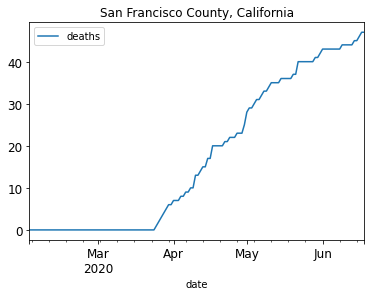

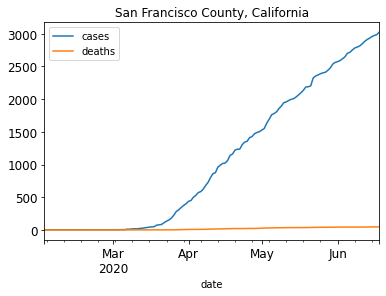

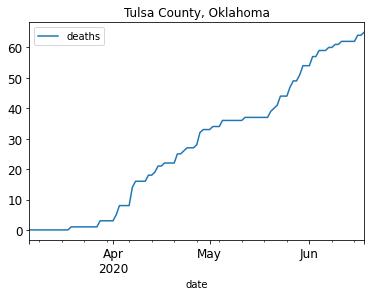

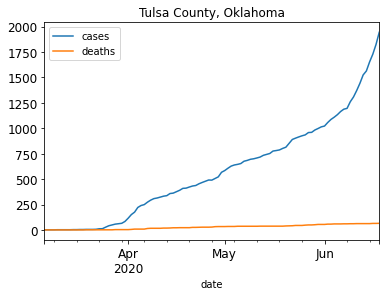

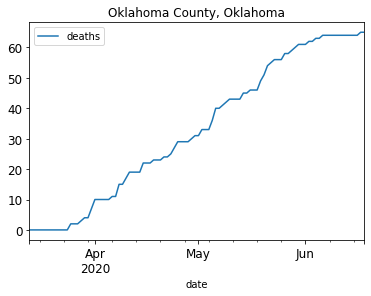

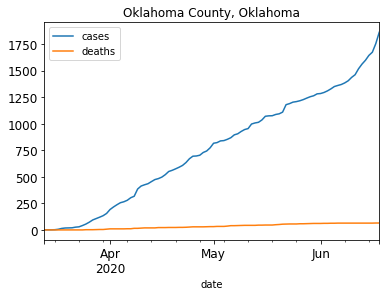

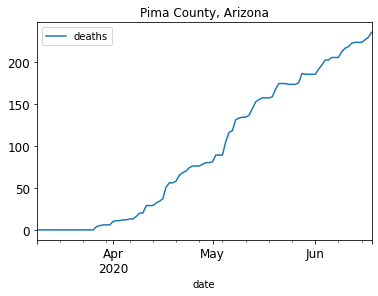

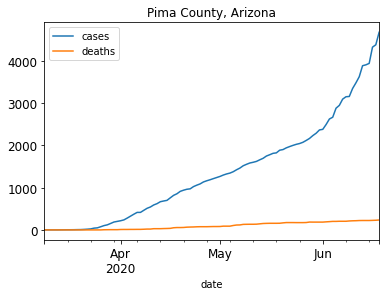

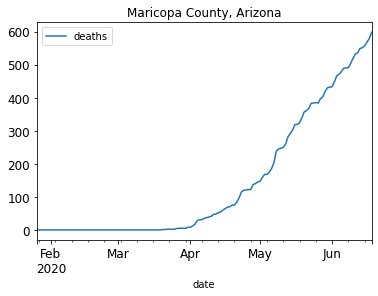

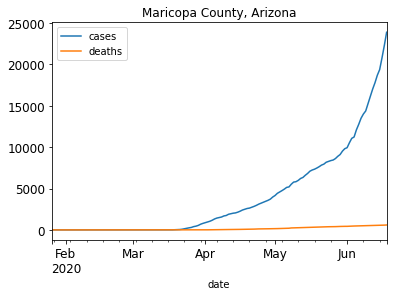

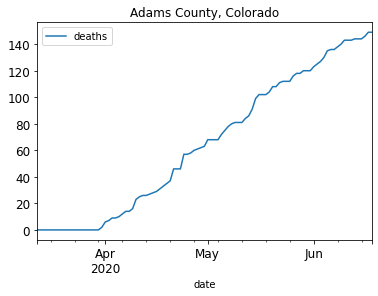

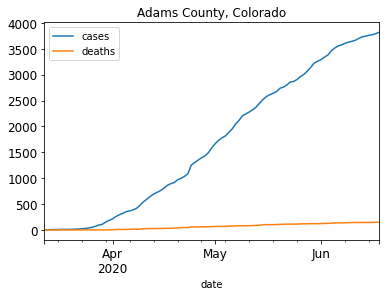

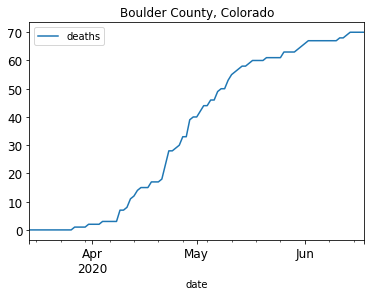

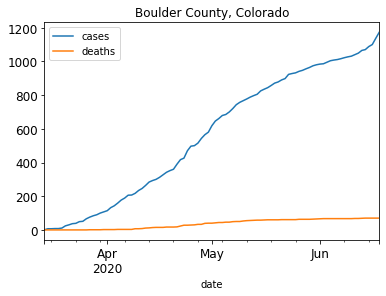

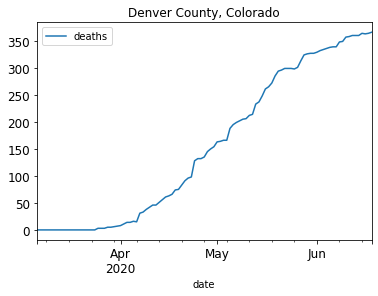

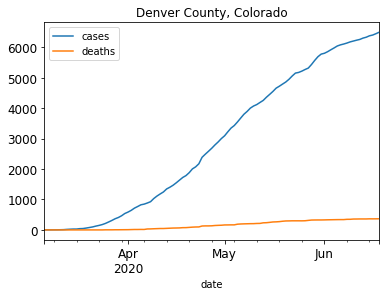

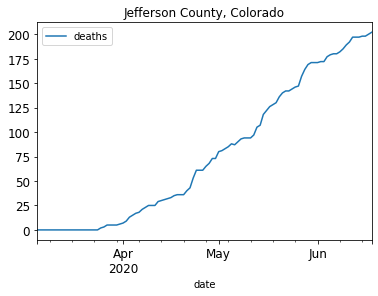

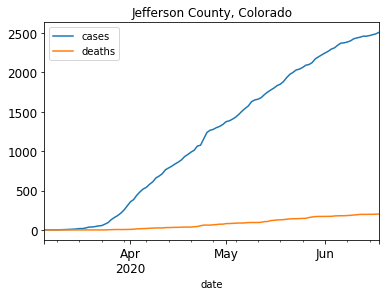

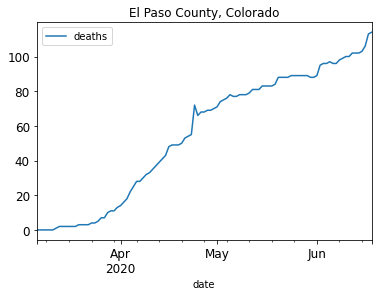

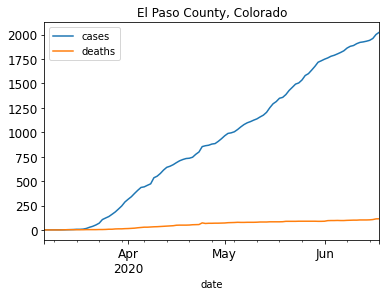

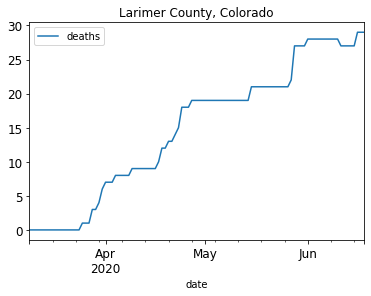

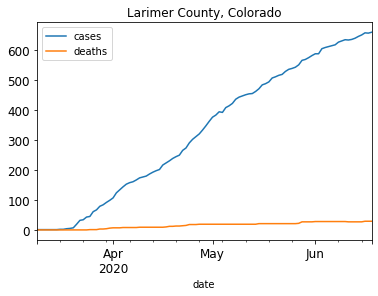

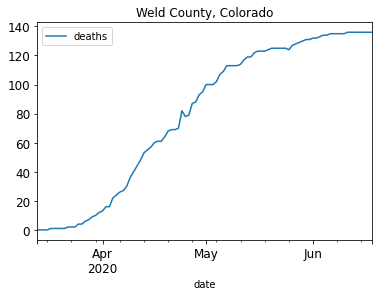

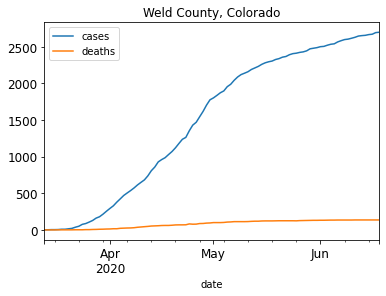

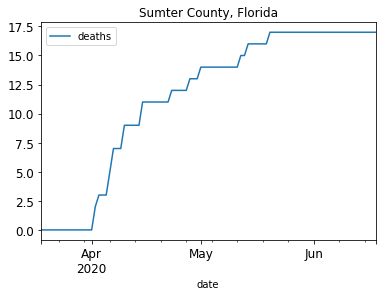

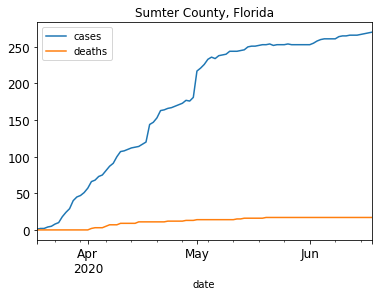

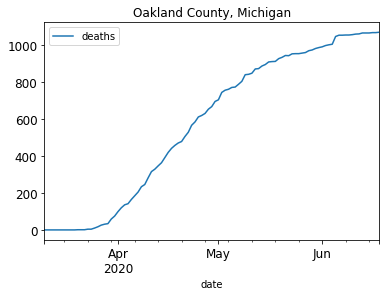

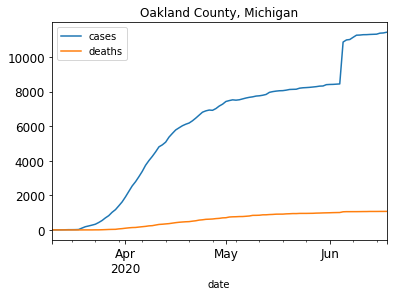

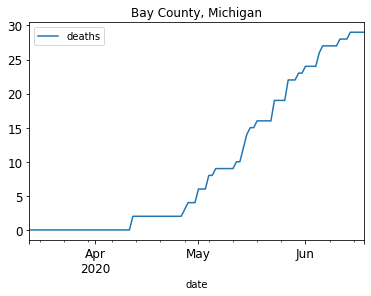

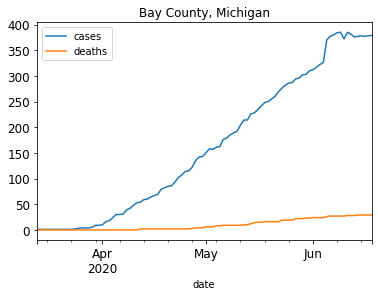

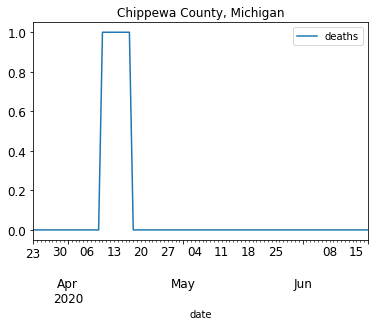

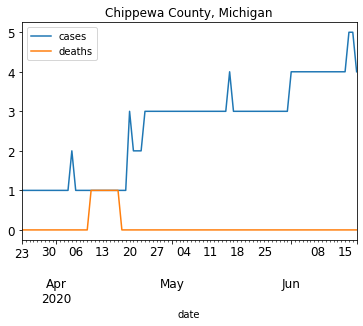

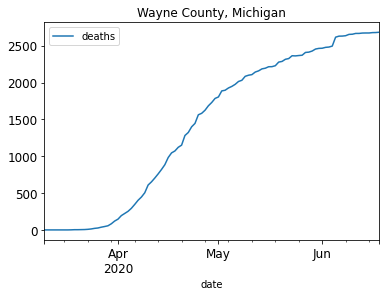

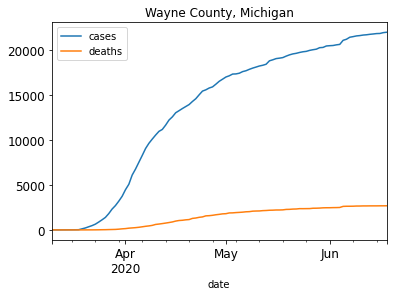

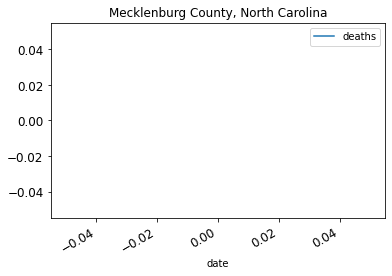

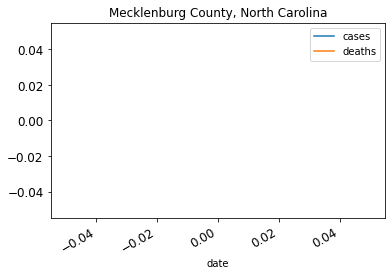

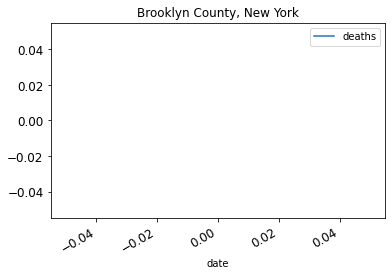

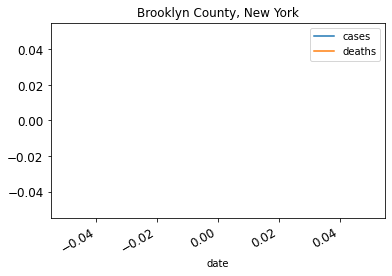

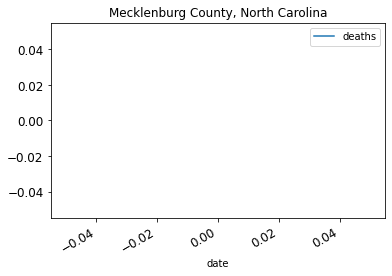

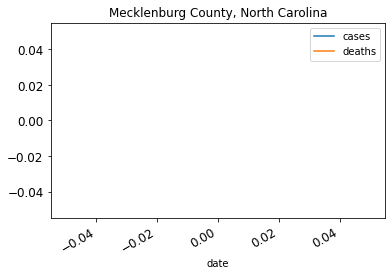

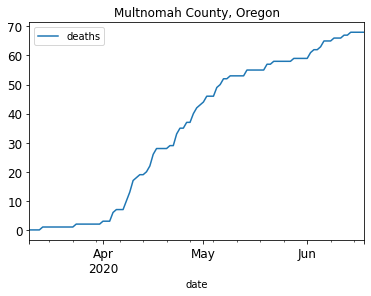

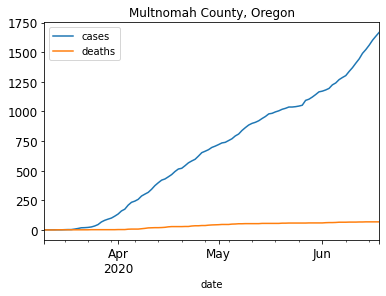

In [131]:
# added states because of ambiguous Jefferson and Wayne

count = 0
states = {}

for county, state in counties:
    #Select by state.
    print ("# run County " + county)

    #Pull out the state that comes with the county 
    df_state= df.loc[df['state'] == state ]

    if (state not in states):
        print ("# df_state ###################") 
        print (df_state)
        print ("# /df_state ###################") 

        states[state] = 1
        count = count + 1

        print ("Full " + state)
        print (df_state.shape[0])

#        fig1 = df_state.plot(x='date',
#            kind='line',
#            y='deaths',
#            title=state + " State deaths").get_figure()
#        fig1.savefig(Imagedir + "/" + state + ".png")


    # this grabs only the ones that have the county field set to the 
    # value of county variable
    df_county = df_state.loc[df_state['county'] == county ]

    # doesnt work right now 
    #df_county = running_avg(df_county,'deaths',9,'SMA_9')

    print ("# df_county ###################") 
    print (df_county)
    print ("# /df_county ###################") 

    df_county.shape


    fig1 = df_county.plot(
        x='date',
        y=['deaths'],
        fontsize=12,
        title=county + " County, " + state).get_figure()
    fig1.savefig(Image_dir + "/" + state + "_" + county + "_deaths" + ".png")

    fig2 = df_county.plot(x='date',
        y=['cases','deaths'],
        fontsize=12,
        title=county + " County, " + state).get_figure()
    fig2.savefig(Image_dir + "/" + state + "_" + county + "_cases_deaths" + ".png")
# the averaging isn't working today...     
#    fig3 = df_county.plot(x='date',
#                       y=['SMA_9'],
#                       fontsize=12,
#                       title=county + " County (smoothed first version), " + state).get_figure()
#    fig3.savefig(Image_dir + "/" + state + "_" + county + "_death_smoothed" + ".png")